# **REGRESSION ANALYSIS ON VEHICLES DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset chosen  is - dataset3         
x - km_driven                 
y - selling_price 

In [ ]:
dataset3 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
dataset3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
Y = dataset3[['selling_price']]

In [ ]:
X = dataset3.drop(['selling_price', 'year'],  axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4340 non-null   object
 1   km_driven     4340 non-null   int64 
 2   fuel          4340 non-null   object
 3   seller_type   4340 non-null   object
 4   transmission  4340 non-null   object
 5   owner         4340 non-null   object
dtypes: int64(1), object(5)
memory usage: 203.6+ KB


In [ ]:
columns = X.columns
columns

Index(['name', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [ ]:
X.head()

,name,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
X.describe()

,km_driven
count,4340.000000
mean,66215.777419
std,46644.102194
min,1.000000
25%,35000.000000
50%,60000.000000
75%,90000.000000
max,806599.000000


In [ ]:
dataset3 = dataset3.drop(['year'], axis=1)

In [ ]:
dataset3 = dataset3.drop(['name'], axis=1)

In [ ]:
dataset3 = dataset3.drop(['fuel'], axis=1)

In [ ]:
dataset3 = dataset3.drop(['seller_type'], axis=1)

In [ ]:
dataset3 = dataset3.drop(['transmission'], axis=1)

In [ ]:
dataset3 = dataset3.drop(['owner'], axis=1)

In [ ]:
dataset3.corr(method='pearson')

,selling_price,km_driven
selling_price,1.000000,-0.192289
km_driven,-0.192289,1.000000


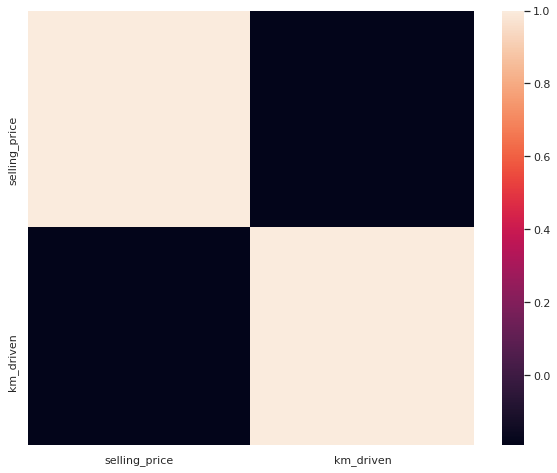

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset3.corr())

In [ ]:
X = dataset3['km_driven']

# REGRESSION ANALYSIS

In [ ]:
import statsmodels.api as sml
from statsmodels import tools

X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(Y,X_new).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     166.6
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           2.03e-37
Time:                        07:02:45   Log-Likelihood:                -63660.
No. Observations:                4340   AIC:                         1.273e+05
Df Residuals:                    4338   BIC:                         1.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.621e+05    1.5e+04     44.232      0.000    6.33e+05    6.91e+05
km_driven     -2.3850      0.185    -12.906      0.000      -2.747      -2.023
==============================================================================
Omnibus:                     4343.651   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266817.521
Skew:                           4.883   Prob(JB):                         0.00
Kurtosis:                      40.150   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Y

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [ ]:
X

0        70000
1        50000
2       100000
3        46000
4       141000
         ...  
4335     80000
4336     80000
4337     83000
4338     90000
4339     40000
Name: km_driven, Length: 4340, dtype: int64

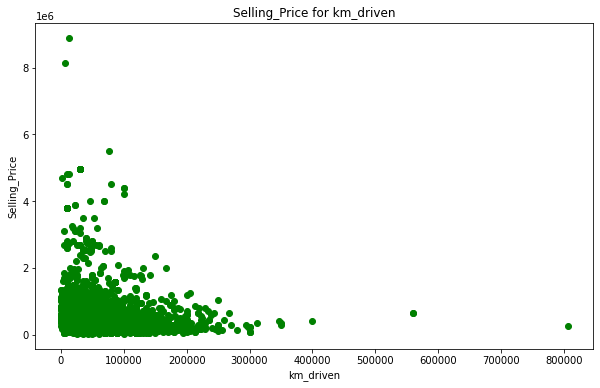

In [ ]:

plt.figure(figsize=(10,6))
plt.xlabel('km_driven')
plt.ylabel('Selling_Price')
plt.title('Selling_Price for km_driven')
plt.scatter(X,Y, marker='o', color='g')

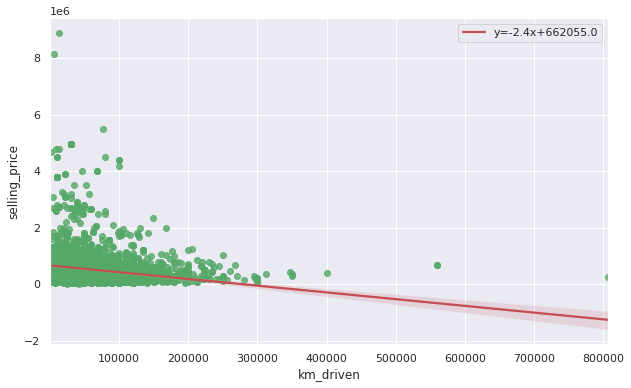

In [ ]:

from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset3['km_driven'],dataset3['selling_price'])

f = plt.figure(figsize=(10,6))
data = dataset3[['selling_price','km_driven']]
ax = sns.regplot(x='km_driven', y='selling_price', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [ ]:
print(slope, intercept)

-2.385046317623576 662055.0078537667


In [ ]:
print(std_err)

0.18480649761972007
